In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=2
dl=np.around(0.01/n,decimals=5)
x0=0.4
y0=0.4
nx=int(np.rint(1+x0/(dl)))
ny=int(np.rint(1+y0/(dl)))
x=np.linspace(0,x0,nx)
y=np.linspace(0,y0,ny)
xx,yy=np.meshgrid(x,y)
xx=np.around(xx,decimals=5)
yy=np.around(yy,decimals=5)
Mx=np.array([xx,yy])
lpx=0.12
lpy=0.12
lcen=0.2
l0x=lcen
l0y=lcen
l1x=np.around(lcen+lpx,decimals=5)
l1y=np.around(lcen+lpy,decimals=5)
xe1=np.around(x0-dl,decimals=5)
ye1=np.around(y0-dl,decimals=5)

## Solucion Generacion

In [3]:
VsolG=np.zeros(nx*ny)
matG=np.zeros((nx*ny,nx*ny))
geG=np.zeros((ny,nx))
geG[0,:]=1
geG[ny-1,:]=2
geG[:,0]=3
geG[:,nx-1]=4
geG[(xx>0.05)&(xx<0.15)&(yy>0.05)&(yy<0.15)]=5
geG[0,0]=6
geG[ny-1,0]=7
geG[0,nx-1]=8
geG[ny-1,nx-1]=9
geG[(xx>l0x)&(xx<l1x)&(yy>l0y)&(yy<l1y)]=10
geG[(xx>=0.05)&(xx<=0.15)&(yy==0.05)]=11
geG[(xx>=0.05)&(xx<=0.15)&(yy==0.15)]=12
geG[(yy>=0.05)&(yy<=0.15)&(xx==0.05)]=13
geG[(yy>=0.05)&(yy<=0.15)&(xx==0.15)]=14

for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(geG[j,i]==0):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=matG[ind,ind+nx]=matG[ind,ind-nx]=1
        elif(geG[j,i]==1):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=1
            matG[ind,ind+nx]=2
        elif(geG[j,i]==2):
            matG[ind,ind]=1
        elif(geG[j,i]==3):
            matG[ind,ind]=-4
            matG[ind,ind-nx]=matG[ind,ind+nx]=1
            matG[ind,ind+1]=2
        elif(geG[j,i]==4):
            matG[ind,ind]=1
        elif(geG[j,i]==5):
            matG[ind,ind]=1
            VsolG[ind]=0
        elif(geG[j,i]==6):
            matG[ind,ind]=-2
            matG[ind,ind+1]=matG[ind,ind+nx]=1
        elif(geG[j,i]==7):
            matG[ind,ind]=-2
            matG[ind,ind+1]=matG[ind,ind-nx]=1
        elif(geG[j,i]==8):
            matG[ind,ind]=-2
            matG[ind,ind-1]=matG[ind,ind+nx]=1
        elif(geG[j,i]==9):
            matG[ind,ind]=1
        elif(geG[j,i]==10):
            matG[ind,ind]=1
        elif(geG[j,i]==11):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=1
            matG[ind,ind-nx]=2
            VsolG[ind]=-1
        elif(geG[j,i]==12):
            matG[ind,ind]=-4
            matG[ind,ind-1]=matG[ind,ind+1]=1
            matG[ind,ind+nx]=2
            VsolG[ind]=-1
        elif(geG[j,i]==13):
            matG[ind,ind]=-4
            matG[ind,ind-nx]=matG[ind,ind+nx]=1
            matG[ind,ind-1]=2
            VsolG[ind]=-1
        elif(geG[j,i]==14):
            matG[ind,ind]=-4
            matG[ind,ind-nx]=matG[ind,ind+nx]=1
            matG[ind,ind+1]=2
            VsolG[ind]=-1
            
TG=np.linalg.solve(matG,VsolG)
TmG = TG.reshape((ny, nx))
print(np.min(TmG),np.max(TmG))

0.0 34.51681395519417


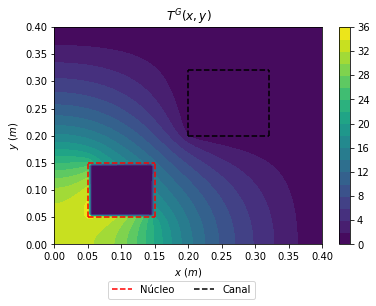

In [4]:
plt.contourf(xx, yy, TmG, 20)
plt.title("$T^{G}(x,y)$")
plt.xlabel("$x\ (m)$")
plt.ylabel("$y\ (m)$")
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.2,-0.25),ncol=2)

plt.colorbar();

## Solucion Refrigeracion

In [5]:
VsolR=np.zeros(nx*ny)
matR=np.zeros((nx*ny,nx*ny))
geR=np.zeros((ny,nx))
geR[0,:]=1
geR[ny-1,:]=2
geR[:,0]=3
geR[:,nx-1]=4
geR[(xx>=0.05)&(xx<=0.15)&(yy>=0.05)&(yy<=0.15)]=5
geR[0,0]=6
geR[ny-1,0]=7
geR[0,nx-1]=8
geR[ny-1,nx-1]=9
geR[(xx>l0x)&(xx<l1x)&(yy>l0y)&(yy<l1y)]=10
geR[(xx>=0.05)&(xx<=0.15)&(yy==0.05)]=11
geR[(xx>=0.05)&(xx<=0.15)&(yy==0.15)]=12
geR[(yy>=0.05)&(yy<=0.15)&(xx==0.05)]=13
geR[(yy>=0.05)&(yy<=0.15)&(xx==0.15)]=14

for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(geR[j,i]==0):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=matR[ind,ind+nx]=matR[ind,ind-nx]=1
        elif(geR[j,i]==1):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=1
            matR[ind,ind+nx]=2
        elif(geR[j,i]==2):
            matR[ind,ind]=1
        elif(geR[j,i]==3):
            matR[ind,ind]=-4
            matR[ind,ind-nx]=matR[ind,ind+nx]=1
            matR[ind,ind+1]=2
        elif(geR[j,i]==4):
            matR[ind,ind]=1
        elif(geR[j,i]==5):
            matR[ind,ind]=1
            VsolR[ind]=0
        elif(geR[j,i]==6):
            matR[ind,ind]=-2
            matR[ind,ind+1]=matR[ind,ind+nx]=1
        elif(geR[j,i]==7):
            matR[ind,ind]=-2
            matR[ind,ind+1]=matR[ind,ind-nx]=1
        elif(geR[j,i]==8):
            matR[ind,ind]=-2
            matR[ind,ind-1]=matR[ind,ind+nx]=1
        elif(geR[j,i]==9):
            matR[ind,ind]=-2
            matR[ind,ind-1]=matR[ind,ind-nx]=1
        elif(geR[j,i]==10):
            matR[ind,ind]=1
            VsolR[ind]=1 
        elif(geR[j,i]==11):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=1
            matR[ind,ind-nx]=2
        elif(geR[j,i]==12):
            matR[ind,ind]=-4
            matR[ind,ind-1]=matR[ind,ind+1]=1
            matR[ind,ind+nx]=2
        elif(geR[j,i]==13):
            matR[ind,ind]=-4
            matR[ind,ind-nx]=matR[ind,ind+nx]=1
            matR[ind,ind-1]=2
        elif(geR[j,i]==14):
            matR[ind,ind]=-4
            matR[ind,ind-nx]=matR[ind,ind+nx]=1
            matR[ind,ind+1]=2
            
TR=np.linalg.solve(matR,VsolR)
TmR = TR.reshape((ny, nx))
print(np.min(TmR),np.max(TmR))

0.0 1.0000000000000007


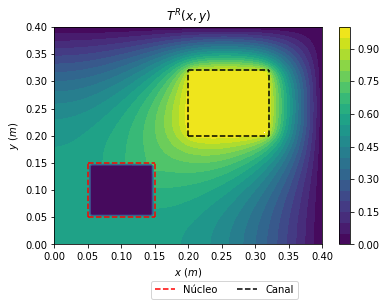

In [6]:
plt.contourf(xx, yy, TmR, 20)
plt.title("$T^{R}(x,y)$")
plt.xlabel("$x\ (m)$")
plt.ylabel("$y\ (m)$")
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.36,-0.25),ncol=2)
plt.colorbar();

## Solucion Paredes Externas

In [7]:
VsolE=np.zeros(nx*ny)
matE=np.zeros((nx*ny,nx*ny))
geE=np.zeros((ny,nx))
geE[0,:]=1
geE[ny-1,:]=2
geE[:,0]=3
geE[:,nx-1]=4
geE[(xx>=0.05)&(xx<=0.15)&(yy>=0.05)&(yy<=0.15)]=5
geE[0,0]=6
geE[ny-1,0]=7
geE[0,nx-1]=8
geE[ny-1,nx-1]=9
geE[(xx>l0x)&(xx<l1x)&(yy>l0y)&(yy<l1y)]=10
geE[(xx>=0.05)&(xx<=0.15)&(yy==0.05)]=11
geE[(xx>=0.05)&(xx<=0.15)&(yy==0.15)]=12
geE[(yy>=0.05)&(yy<=0.15)&(xx==0.05)]=13
geE[(yy>=0.05)&(yy<=0.15)&(xx==0.15)]=14

for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(geE[j,i]==0):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=matE[ind,ind+nx]=matE[ind,ind-nx]=1
        elif(geE[j,i]==1):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=1
            matE[ind,ind+nx]=2
        elif(geE[j,i]==2):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==3):
            matE[ind,ind]=-4
            matE[ind,ind-nx]=matE[ind,ind+nx]=1
            matE[ind,ind+1]=2
        elif(geE[j,i]==4):
            matE[ind,ind]=1
            VsolE[ind]=1        
        elif(geE[j,i]==5):
            matE[ind,ind]=1
            VsolE[ind]=0
        elif(geE[j,i]==6):
            matE[ind,ind]=-2
            matE[ind,ind+1]=matE[ind,ind+nx]=1
        elif(geE[j,i]==7):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==8):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==9):
            matE[ind,ind]=1
            VsolE[ind]=1
        elif(geE[j,i]==10):
            matE[ind,ind]=1
        elif(geE[j,i]==11):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=1
            matE[ind,ind-nx]=2
        elif(geE[j,i]==12):
            matE[ind,ind]=-4
            matE[ind,ind-1]=matE[ind,ind+1]=1
            matE[ind,ind+nx]=2
        elif(geE[j,i]==13):
            matE[ind,ind]=-4
            matE[ind,ind-nx]=matE[ind,ind+nx]=1
            matE[ind,ind-1]=2
        elif(geE[j,i]==14):
            matE[ind,ind]=-4
            matE[ind,ind-nx]=matE[ind,ind+nx]=1
            matE[ind,ind+1]=2
            
TE=np.linalg.solve(matE,VsolE)
TmE = TE.reshape((ny, nx))
TmE[(xx>=l0x)&(xx<=l1x)&(yy>=l0y)&(yy<=l1y)]=0
print(np.min(TmE),np.max(TmE))

0.0 1.0


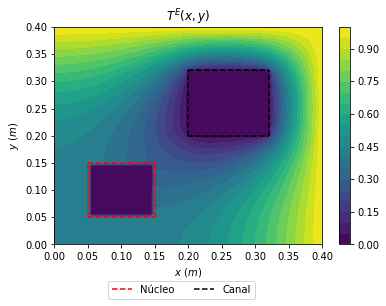

In [8]:
plt.contourf(xx, yy, TmE, 20)
plt.title("$T^{E}(x,y)$")
plt.xlabel("$x\ (m)$")
plt.ylabel("$y\ (m)$")
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.2,-0.25),ncol=2)
plt.colorbar();

## Solucion Problema

In [9]:
k=100

In [10]:
keg=(-np.mean(TmG[(yy==y0)]-TmG[(yy==ye1)])-np.mean(TmG[(yy==x0)]-TmG[(yy==xe1)]))*k

krg=(-np.mean(TmG[(xx>=l0x)&(xx<=l1x)&(yy==l0y)]-TmG[(xx>=l0x)&(xx<=l1x)&(yy==np.around(l0y-dl))])-np.mean(TmG[(xx>=l0x)&(xx<=l1x)&(yy==l1y)]-TmG[(xx>=l1x)&(xx<=l1x)&(yy==np.around(l1y+dl,decimals=5))])-np.mean(TmG[(yy>=l0y)&(yy<=l1y)&(xx==l0x)]-TmG[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l0x-dl,decimals=5))])-np.mean(TmG[(yy>=l0y)&(yy<=l1y)&(xx==l1x)]-TmG[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l1x+dl,decimals=5))]))*k

In [11]:
ker=(-np.mean(TmR[(yy==y0)]-TmR[(yy==ye1)])-np.mean(TmR[(yy==x0)]-TmR[(yy==xe1)]))*k

krr=(-np.mean(TmR[(xx>=l0x)&(xx<=l1x)&(yy==l0y)]-TmR[(xx>=l0x)&(xx<=l1x)&(yy==np.around(l0y-dl,decimals=5))])-np.mean(TmR[(xx>=l0x)&(xx<=l1x)&(yy==l1y)]-TmR[(xx>=l1x)&(xx<=l1x)&(yy==np.around(l1y+dl,decimals=5))])-np.mean(TmR[(yy>=l0y)&(yy<=l1y)&(xx==l0x)]-TmR[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l0x-dl,decimals=5))])-np.mean(TmR[(yy>=l0y)&(yy<=l1y)&(xx==l1x)]-TmR[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l1x+dl,decimals=5))]))*k

In [12]:
kee=(-np.mean(TmE[(yy==y0)]-TmE[(yy==ye1)])-np.mean(TmE[(yy==x0)]-TmE[(yy==xe1)]))*k

kre=(-np.mean(TmE[(xx>=l0x)&(xx<=l1x)&(yy==l0y)]-TmE[(xx>=l0x)&(xx<=l1x)&(yy==np.around(l0y-dl,decimals=5))])-np.mean(TmE[(xx>=l0x)&(xx<=l1x)&(yy==l1y)]-TmE[(xx>=l1x)&(xx<=l1x)&(yy==np.around(l1y+dl,decimals=5))])-np.mean(TmE[(yy>=l0y)&(yy<=l1y)&(xx==l0x)]-TmE[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l0x-dl,decimals=5))])-np.mean(TmE[(yy>=l0y)&(yy<=l1y)&(xx==l1x)]-TmE[(yy>=l0y)&(yy<=l1y)&(xx==np.around(l1x+dl,decimals=5))]))*k

In [13]:
print(keg)
print(krg)
print(ker)
print(krr)
print(kee)
print(kre)

20.74357608400445
896.1410747240624
6.670730260562189
-33.45428826917271
-6.680207910609187
59.865720035569495


In [14]:
pr=2*(lpx+lpy)
rho=997
cp=4179.6
v=0.008
Q=v*lpx*lpy
Qg=50000*2*dl/k

pe=0.8
Tinf=25
T0=40

In [15]:
#he:
ve=10
Pre=0.707
nu=18.37*np.power(0.1,6)
Ree=ve*x0/nu
ke=0.0263
he=0.332*np.power(Ree,1/2)*np.power(Pre,1/3)*ke/x0
he

9.074354252865609

In [16]:
#hr:
kr=0.630
dh=(4*lpx*lpy)/pr
Prr=4
nur=0.6527*np.power(0.1,6)
Rer=v*dh/nur
hr=0.332*np.power(Rer,1/2)*np.power(Prr,1/3)*kr/dh
hr

106.11159950646054

In [17]:
ca1=hr*pr/(rho*cp*Q)
ca2=(hr*pr-krr-(kre*ker/(he*pe-kee)))
c1=(ca1/ca2)*(krg*Qg+kre*(keg*Qg+he*pe*Tinf)/(he*pe-kee))
c2=ca1*((hr*pr/ca2)-1)

In [18]:
print(c1)
print(c2)

10.860648982088087
-0.009148359921863606


In [19]:
from scipy.integrate import odeint

# function that returns dy/dt
def model(T,z):
    dTdz = c1+c2*T
    return dTdz

z = np.linspace(0,1,num=101, endpoint=True)

Tmedz = odeint(model,T0,z)

In [20]:
Trz=(krg*Qg+hr*pr*Tmedz+kre*((keg*Qg+he*pe*Tinf)/(he*pe-kee)))/(hr*pr-krr-(kre*ker/(he*pe-kee)))

In [21]:
Tez=(keg*Qg+he*pe*Tinf+ker*Trz)/(he*pe-kee)

In [22]:
Qgz=Qg    #revisar

In [23]:
Tfin=np.zeros((np.size(z),ny,nx))
Tgraf=np.zeros((np.size(z),ny,nx))
Tmax=np.zeros(np.size(z))

In [24]:
for i in range((np.size(z))):
    Ttemp=Qgz*TmG+Trz[i]*TmR+Tez[i]*TmE
    Ttemp[(xx>l0x)&(xx<l1x)&(yy>l0y)&(yy<l1y)]=Tmedz[i]
    Tfin[i,:,:]=Ttemp
    Ttemp[(xx>0.05)&(xx<0.15)&(yy>0.05)&(yy<0.15)]=np.nan
    Tgraf[i,:,:]=Ttemp
    Tmax[i]=np.max(Tfin[i,:,:])

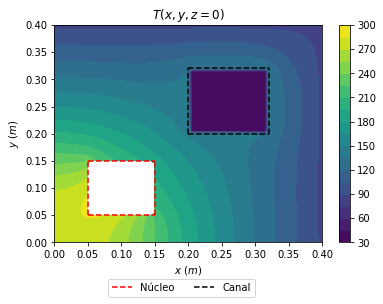

In [25]:
plt.contourf(xx, yy, Tgraf[0,:,:], 20)
plt.title("$T(x,y,z=0)$")
plt.xlabel("$x\ (m)$")
plt.ylabel("$y\ (m)$")
plt.plot([0.05,0.15],[0.05,0.05],"--",c="r")
plt.plot([0.05,0.15],[0.15,0.15],"--",c="r")
plt.plot([0.05,0.05],[0.05,0.15],"--",c="r")
plt.plot([0.15,0.15],[0.05,0.15],"--",c="r",label="Núcleo")
plt.plot([l0x,l0x],[l0y,l1y],"--",c="k")
plt.plot([l0x,l1x],[l0y,l0y],"--",c="k")
plt.plot([l0x,l1x],[l1y,l1y],"--",c="k")
plt.plot([l1x,l1x],[l0y,l1y],"--",c="k",label="Canal")
plt.legend(loc=(0.2,-0.25),ncol=2)
plt.colorbar();

T maxima de cuerpo:   296.359492283672

T maxima de fluido:   50.44685590776462



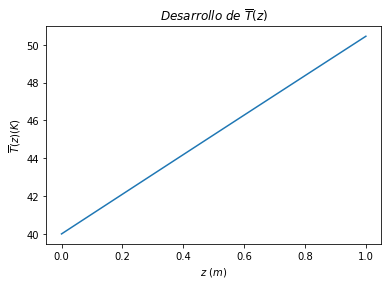


Caudal de fluido:   0.0001152

Reynolds de fluido:   1470.8135437413814



In [26]:
print("T maxima de cuerpo:   "+str(np.max(Tmax)))
print("")
print("T maxima de fluido:   "+str(np.max(Tmedz)))
print("")
# plot results
plt.plot(z,Tmedz)
plt.title("$Desarrollo\ de\ \overline{T}(z)$")
plt.xlabel('$z\ (m)$')
plt.ylabel('$\overline{T}(z) (K)$')
plt.show()

print("")
print("Caudal de fluido:   "+str(Q))
print("")
print("Reynolds de fluido:   "+str(Rer))
print("")